Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read Data

In [2]:
file = pd.ExcelFile("../../../data/v7/Handballprojekt_2Liga_14.01.2023.xlsx")

file.sheet_names

df = file.parse('2. Liga')

# drop last col comments & favorite corner & empy rows at end
df = df.iloc[:, :-2]


Cleanup & Renaming

In [3]:
df.replace('unklar', np.nan,inplace=True)
df.replace('unklar ', np.nan,inplace=True)
df.replace('fehlend', np.nan,inplace=True)
#df.dropna(inplace=True)
df.replace('-', np.nan,inplace=True)
df.columns = [ 'homeTeam','opponentTeam','day','name','playTime',
              'homeGoals','opponentGoals','throwSuccess','whistleThrowTime',
              'LRHandy','throwDirection','goalKeeperPosition',
              'goalKeeperName', 'goalKeeperHeightCM','shooterheightCM',
              'pressureSituation','noOfThrowsFromPlayer',
              'throwQuadrantLastThrow','lastThrowSuccess']
df = df.astype({'homeTeam':'string', 'opponentTeam':'string','day':'float16','name':'string','playTime':'float16',
              'homeGoals':'float16','opponentGoals':'float16','whistleThrowTime':'float16','goalKeeperPosition':'float16',
              'throwSuccess':'float16','LRHandy':'float16','throwDirection':'float16','pressureSituation':'float16','noOfThrowsFromPlayer':'float16',
              'throwQuadrantLastThrow':'float16','lastThrowSuccess':'float16','goalKeeperName':'string', 'goalKeeperHeightCM':'float16','shooterheightCM':'float16' })
df.head()

,homeTeam,opponentTeam,day,name,playTime,homeGoals,opponentGoals,throwSuccess,whistleThrowTime,LRHandy,throwDirection,goalKeeperPosition,goalKeeperName,goalKeeperHeightCM,shooterheightCM,pressureSituation,noOfThrowsFromPlayer,throwQuadrantLastThrow,lastThrowSuccess
0,EHV Aue,TUSEM Essen,1.0,Noah Beyer,10.0,5.0,3.0,1.0,NaN,1.0,3.0,NaN,Bochmann,192.0,180.0,0.0,1.0,NaN,NaN
1,EHV Aue,TUSEM Essen,1.0,Noah Beyer,15.0,8.0,4.0,1.0,NaN,1.0,9.0,NaN,Bochmann,192.0,180.0,0.0,2.0,3.0,1.0
2,EHV Aue,TUSEM Essen,1.0,Noah Beyer,34.0,15.0,14.0,0.0,NaN,1.0,2.0,NaN,Petursson,185.0,180.0,0.0,3.0,9.0,1.0
3,EHV Aue,TUSEM Essen,1.0,Noah Beyer,39.0,18.0,17.0,1.0,NaN,1.0,8.0,NaN,Petursson,185.0,180.0,2.0,4.0,2.0,2.0
4,EHV Aue,TUSEM Essen,1.0,Noah Beyer,43.0,19.0,19.0,1.0,NaN,1.0,7.0,NaN,Petursson,185.0,180.0,0.0,5.0,8.0,1.0


Cleaning

In [4]:
df = df.loc[:,('homeTeam','opponentTeam','throwDirection','throwSuccess','name')].copy()
# Naming correction
df['homeTeam'].replace('SV Salamander Kornwestheim.....', 'SV Salamander Kornwestheim 1894',inplace=True,regex=True)
df['opponentTeam'].replace('SV Salamander Kornwestheim.....', 'SV Salamander Kornwestheim 1894',inplace=True,regex=True)
df['throwSuccess'].replace(2.0, 1.0,inplace=True)
df.loc[0, 'penaltyNo'] = 1
for i in range(1, len(df)):
    df.loc[i, 'penaltyNo'] = df.loc[i-1, 'penaltyNo']+1 if df.loc[i-1, 'homeTeam'] == df.loc[i, 'homeTeam'] and df.loc[i-1, 'opponentTeam'] == df.loc[i, 'opponentTeam'] else 1
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.sort_index(ascending=True)

,homeTeam,opponentTeam,throwDirection,throwSuccess,name,penaltyNo
0,EHV Aue,TUSEM Essen,3.0,1.0,Noah Beyer,1.0
1,EHV Aue,TUSEM Essen,9.0,1.0,Noah Beyer,2.0
2,EHV Aue,TUSEM Essen,2.0,0.0,Noah Beyer,3.0
3,EHV Aue,TUSEM Essen,8.0,1.0,Noah Beyer,4.0
4,EHV Aue,TUSEM Essen,7.0,1.0,Noah Beyer,5.0
5,HC Elbflorenz 2007,TUSEM Essen,7.0,0.0,Noah Beyer,1.0
6,HC Elbflorenz 2009,TUSEM Essen,3.0,0.0,Noah Beyer,1.0
7,SG BBM Bietigheim,TUSEM Essen,1.0,1.0,Noah Beyer,1.0
8,SG BBM Bietigheim,TUSEM Essen,9.0,1.0,Noah Beyer,2.0
9,SG BBM Bietigheim,TUSEM Essen,7.0,1.0,Noah Beyer,4.0


In [5]:
df1 =pd.crosstab(df['penaltyNo'], df['throwDirection'], margins=True, margins_name="Total") 
df1

throwDirection,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,Total
penaltyNo,,,,,,,,,,
1.0,8,1,6,1,0,2,13,4,18,53
2.0,7,2,4,0,0,3,6,8,18,48
3.0,5,3,3,3,0,1,6,5,13,39
4.0,0,2,3,0,1,1,5,6,9,27
5.0,2,1,2,0,0,2,2,4,7,20
6.0,1,2,1,1,0,1,5,0,3,14
7.0,0,0,2,1,0,0,3,0,2,8
8.0,1,0,1,0,0,0,0,2,2,6
9.0,0,0,2,0,0,0,0,0,0,2


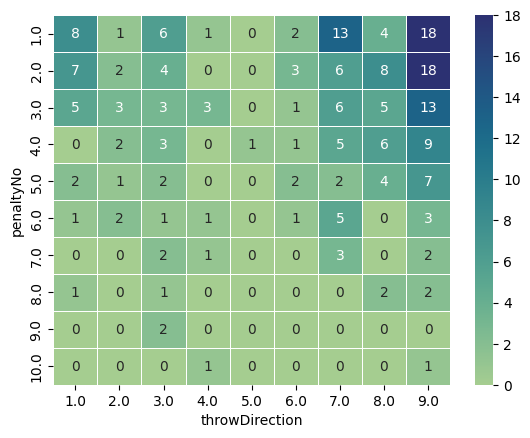

In [6]:
ax = sns.heatmap(pd.crosstab(df['penaltyNo'], df['throwDirection']), linewidth=0.5, annot=True, cmap="crest")
#ax.xaxis.tick_top()
plt.show()

Success

In [7]:
dfs = df.loc[df['throwSuccess'] == 1]
df2 =pd.crosstab(dfs['penaltyNo'], dfs['throwDirection'], margins=True, margins_name="Total") 
df2

throwDirection,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,Total
penaltyNo,,,,,,,,,,
1.0,6,1,5,1,0,1,11,3,16,44
2.0,7,1,3,0,0,3,3,8,13,38
3.0,5,1,3,3,0,0,6,5,11,34
4.0,0,1,3,0,1,1,5,5,6,22
5.0,2,1,2,0,0,2,1,3,7,18
6.0,1,2,0,0,0,1,5,0,3,12
7.0,0,0,2,1,0,0,3,0,2,8
8.0,1,0,1,0,0,0,0,2,2,6
9.0,0,0,2,0,0,0,0,0,0,2


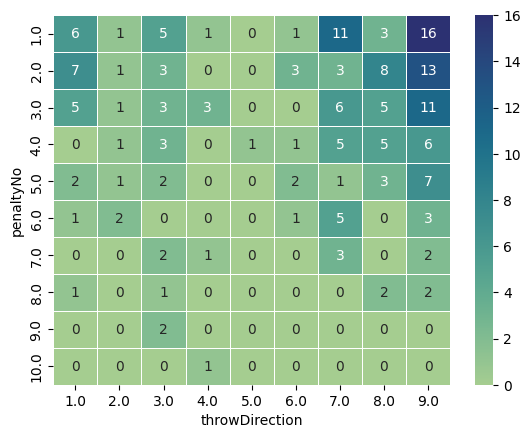

In [8]:
axs = sns.heatmap(pd.crosstab(dfs['penaltyNo'], dfs['throwDirection']), linewidth=0.5, annot=True, cmap="crest")
#ax.xaxis.tick_top()
plt.show()

Failed

In [9]:
dff = df.loc[df['throwSuccess'] == 0]
df3 =pd.crosstab(dff['penaltyNo'], dff['throwDirection'], margins=True, margins_name="Total") 
df3

throwDirection,1.0,2.0,3.0,4.0,6.0,7.0,8.0,9.0,Total
penaltyNo,,,,,,,,,
1.0,2,0,1,0,1,2,1,2,9
2.0,0,1,1,0,0,3,0,5,10
3.0,0,2,0,0,1,0,0,2,5
4.0,0,1,0,0,0,0,1,3,5
5.0,0,0,0,0,0,1,1,0,2
6.0,0,0,1,1,0,0,0,0,2
10.0,0,0,0,0,0,0,0,1,1
Total,2,4,3,1,2,6,3,13,34


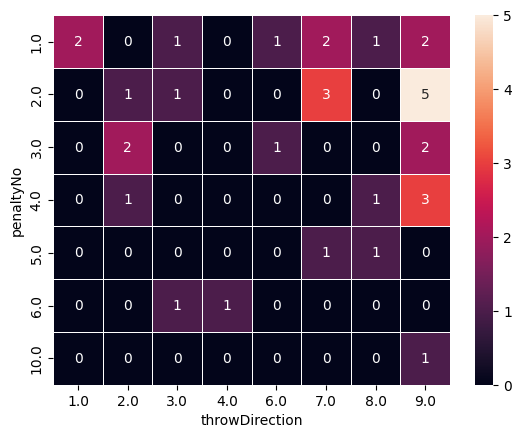

In [10]:
axf = sns.heatmap(pd.crosstab(dff['penaltyNo'], dff['throwDirection']), linewidth=0.5, annot=True)
#ax.xaxis.tick_top()
plt.show()

Percentage Success

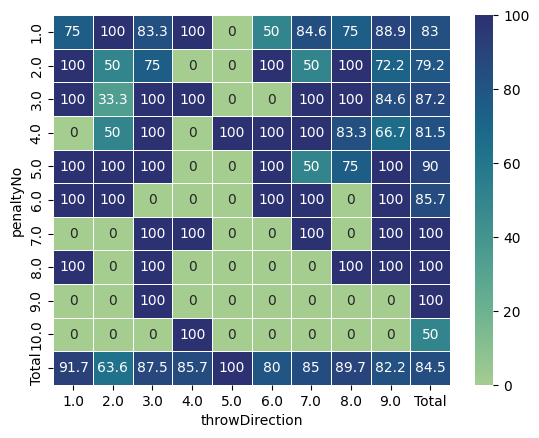

throwDirection,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,Total
penaltyNo,,,,,,,,,,
1.0,75.000000,100.000000,83.333333,100.000000,0.0,50.0,84.615385,75.000000,88.888889,83.018868
2.0,100.000000,50.000000,75.000000,0.000000,0.0,100.0,50.000000,100.000000,72.222222,79.166667
3.0,100.000000,33.333333,100.000000,100.000000,0.0,0.0,100.000000,100.000000,84.615385,87.179487
4.0,0.000000,50.000000,100.000000,0.000000,100.0,100.0,100.000000,83.333333,66.666667,81.481481
5.0,100.000000,100.000000,100.000000,0.000000,0.0,100.0,50.000000,75.000000,100.000000,90.000000
6.0,100.000000,100.000000,0.000000,0.000000,0.0,100.0,100.000000,0.000000,100.000000,85.714286
7.0,0.000000,0.000000,100.000000,100.000000,0.0,0.0,100.000000,0.000000,100.000000,100.000000
8.0,100.000000,0.000000,100.000000,0.000000,0.0,0.0,0.000000,100.000000,100.000000,100.000000
9.0,0.000000,0.000000,100.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,100.000000


In [11]:
relSuccess = df2/df1*100
relSuccess.replace(np.nan,0,inplace=True)
axrs = sns.heatmap(relSuccess, linewidth=0.5, annot=True, cmap="crest",fmt='.3g')
#ax.xaxis.tick_top()
plt.show()
relSuccess

Pattern